In [1]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

# file paths
file_name = "/content/drive/My Drive/ML CW/data/bank-additional-full.csv"  # Full path to the input file
output_file = "/content/drive/My Drive/ML CW/data/cleaned_file.csv"  # Full path to the output file

# Checking if the file exists in the current directory
if os.path.isfile(file_name):
    print(f"'{file_name}' found. Loading file...")

    # Loading the CSV file
    data = pd.read_csv(file_name, header=None)

    # Checking the first few rows to confirm the data format
    print("Raw data preview:")
    print(data.head())

    # Splitting the single column into multiple columns based on semicolons
    data_split = data[0].str.split(';', expand=True)

    # Removing double quotes from string values
    data_cleaned = data_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

    # Display the cleaned data
    print("\nCleaned data preview:")
    print(data_cleaned.head())

    # Saving the processed dataset to Google Drive
    data_cleaned.to_csv(output_file, index=False)
    print(f"\nCleaned data saved to: {output_file}")

else:
    print(f"Error: '{file_name}' not found in the current directory.")


Mounted at /content/drive
'/content/drive/My Drive/ML CW/data/bank-additional-full.csv' found. Loading file...
Raw data preview:
                                                   0
0  age;"job";"marital";"education";"default";"hou...
1  56;"housemaid";"married";"basic.4y";"no";"no";...
2  57;"services";"married";"high.school";"unknown...
3  37;"services";"married";"high.school";"no";"ye...
4  40;"admin.";"married";"basic.6y";"no";"no";"no...


<ipython-input-1-2fe99cd18b10>:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = data_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)



Cleaned data preview:
    0          1        2            3        4        5     6          7   \
0  age        job  marital    education  default  housing  loan    contact   
1   56  housemaid  married     basic.4y       no       no    no  telephone   
2   57   services  married  high.school  unknown       no    no  telephone   
3   37   services  married  high.school       no      yes    no  telephone   
4   40     admin.  married     basic.6y       no       no    no  telephone   

      8            9   ...        11     12        13           14  \
0  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1    may          mon  ...         1    999         0  nonexistent   
2    may          mon  ...         1    999         0  nonexistent   
3    may          mon  ...         1    999         0  nonexistent   
4    may          mon  ...         1    999         0  nonexistent   

             15              16             17         18           19  20  
0  emp.var

In [2]:
import pandas as pd

# Loading the cleaned data after splitting semicolons
cleaned_data_path = '/content/drive/My Drive/ML CW/data/cleaned_file.csv'
cleaned_data = pd.read_csv(cleaned_data_path)

# Replacing 'unknown' with NaN in the entire dataframe
cleaned_data.replace('unknown', pd.NA, inplace=True)

# Displaying the cleaned data
print(cleaned_data.head())

output_file = "/content/drive/My Drive/ML CW/data/cleaned_with_na.csv"
cleaned_data.to_csv(output_file, index=False)
print(f"\nCleaned data saved to: {output_file}")


<ipython-input-2-f71f2637570c>:5: DtypeWarning: Columns (0,10,11,12,13,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv(cleaned_data_path)


     0          1        2            3        4        5     6          7  \
0  age        job  marital    education  default  housing  loan    contact   
1   56  housemaid  married     basic.4y       no       no    no  telephone   
2   57   services  married  high.school     <NA>       no    no  telephone   
3   37   services  married  high.school       no      yes    no  telephone   
4   40     admin.  married     basic.6y       no       no    no  telephone   

       8            9  ...        11     12        13           14  \
0  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1    may          mon  ...         1    999         0  nonexistent   
2    may          mon  ...         1    999         0  nonexistent   
3    may          mon  ...         1    999         0  nonexistent   
4    may          mon  ...         1    999         0  nonexistent   

             15              16             17         18           19  20  
0  emp.var.rate  cons.price.idx  

In [3]:
cleaned_data_path = '/content/drive/My Drive/ML CW/data/cleaned_with_na.csv'

# Reading the CSV file, treating the second row as column headers
cleaned_data = pd.read_csv(cleaned_data_path, header=1)  # header=1 as the first row is column number

# Checking the first few rows and column names
print("Column Names:")
print(cleaned_data.columns)

print("\nFirst Few Rows:")
print(cleaned_data.head())

# Function to identify missing values in a column
def identify_missing_values(df, column_name):
    missing_values_count = df[column_name].isna().sum()  # Counts NaN values
    blank_values_count = (df[column_name] == '').sum()  # Counts blank strings

    print(f"Missing values (NaN) in column '{column_name}': {missing_values_count}")
    print(f"Blank values in column '{column_name}': {blank_values_count}")
    return missing_values_count, blank_values_count

# List of columns to check - all columns
columns = [
    "age", "job", "marital", "education", "default", "housing", "loan", "contact",
    "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"
]

# Checking missing values for each column
for column in columns:
    identify_missing_values(cleaned_data, column)

# Saving the cleaned data after replacing 'unknown' with NaN
cleaned_data.to_csv('/content/drive/My Drive/ML CW/data/cleaned_with_na.csv', index=False)

# Displaying the first few rows of the cleaned data to confirm
print(cleaned_data.head())

Column Names:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

First Few Rows:
   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999  

In [4]:
import pandas as pd

# Loading the cleaned data
cleaned_data_path = '/content/drive/My Drive/ML CW/data/cleaned_with_na.csv'
data = pd.read_csv(cleaned_data_path)

# Columns with missing values - found using excel equations
columns_with_missing = ["job", "marital", "education", "default", "housing", "loan"]

# Function to replace missing values with mode (most frequent value)
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]  # Calculating the mode
        df[column].fillna(mode_value, inplace=True)  # Filling the missing values
        print(f"Filled missing values in '{column}' with '{mode_value}'")

# Filling missing values in the specified columns individually
fill_missing_with_mode(data, columns_with_missing)

# Checking for duplicate rows
duplicate_rows = data[data.duplicated()]

# Removing duplicate rows
data = data.drop_duplicates()

# Printing information about removed duplicates
print("Number of duplicate rows removed:", len(duplicate_rows))

# Saving the updated data
output_path = '/content/drive/My Drive/ML CW/data/cleaned_with_na.csv'
data.to_csv(output_path, index=False)

print("Missing values have been handled. The updated data is saved.")


<ipython-input-4-e0b4f01f39ca>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Filling the missing values


Filled missing values in 'job' with 'admin.'
Filled missing values in 'marital' with 'married'
Filled missing values in 'education' with 'university.degree'
Filled missing values in 'default' with 'no'
Filled missing values in 'housing' with 'yes'
Filled missing values in 'loan' with 'no'
Number of duplicate rows removed: 14
Missing values have been handled. The updated data is saved.


In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the cleaned dataset
data_path = '/content/drive/My Drive/ML CW/data/cleaned_with_na.csv'
data = pd.read_csv(data_path)

# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to encode
categorical_columns = [
    "job", "marital", "education", "default", "housing", "loan", "contact",
    "month", "day_of_week", "poutcome", "y"
]

# Dictionary to store class mappings
label_encodings = {}

# Encode each column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
    label_encodings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Encode the target variable 'y'
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Convert columns to float
cols_to_convert = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
data[cols_to_convert] = data[cols_to_convert].astype('float64')

# Check the results
print("Encoded Data:")
print(data.head())

print("\nClass Mappings:")
for col, mapping in label_encodings.items():
    print(f"{col}: {mapping}")

# Save the updated data
output_path = '/content/drive/My Drive/ML CW/data/encoded_data.csv'
data.to_csv(output_path, index=False)


Encoded Data:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -

In [7]:
column_data_types = data.dtypes
print(column_data_types)

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [9]:
# Calculate correlations with the target variable ('y')
correlations = data.corr()['y'].sort_values(ascending=False)

# Print correlations
print(correlations)

y                 1.000000
duration          0.405292
previous          0.230197
poutcome          0.129814
education         0.057237
cons.conf.idx     0.054819
marital           0.045892
age               0.030389
job               0.025596
day_of_week       0.015964
housing           0.011144
default          -0.003042
loan             -0.004486
month            -0.006057
campaign         -0.066371
cons.price.idx   -0.136131
contact          -0.144774
emp.var.rate     -0.298281
euribor3m        -0.307733
pdays            -0.324946
nr.employed      -0.354663
Name: y, dtype: float64


In [10]:
#Deciding on which features to drop

#from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
#model = RandomForestClassifier()
#model.fit(X, y)

# Display feature importances
#importances = model.feature_importances_
#feature_names = X.columns
#feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
#print(feature_importance_df.sort_values(by='Importance', ascending=False))


In [11]:
columns_to_drop = ['default', 'loan', 'month', 'campaign']
data_filtered = data.drop(columns=columns_to_drop)

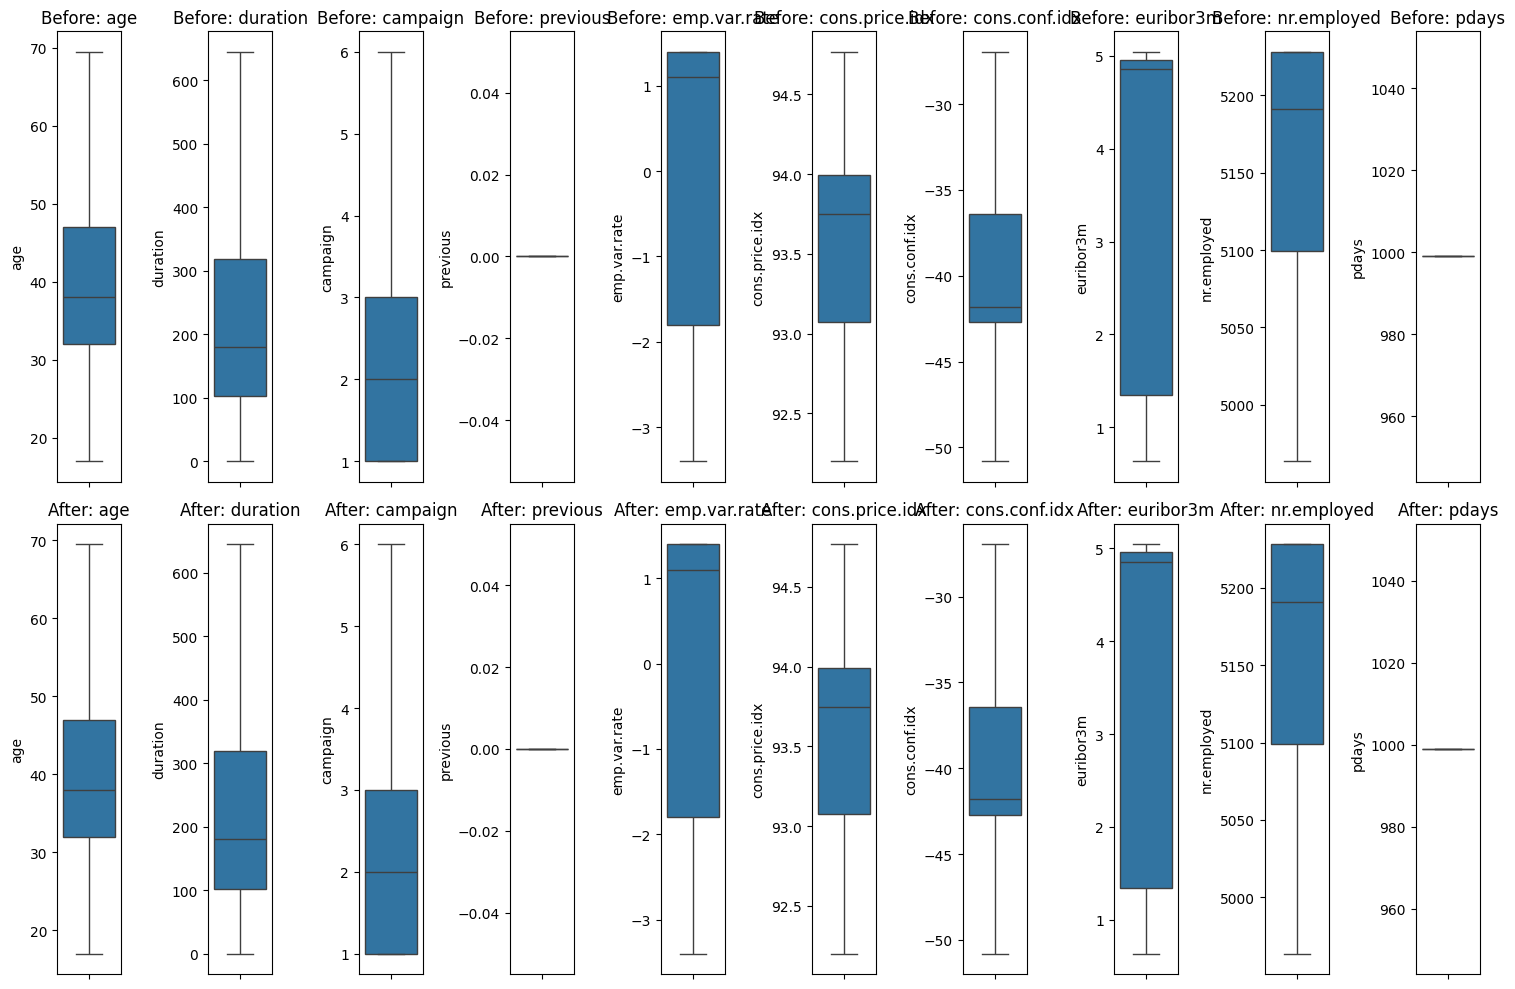

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns for your dataset
numerical_columns = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays']

# Define a function to handle outliers using IQR method
def handle_outliers_with_iqr(column):
    # Calculate quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count occurrences of outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    outlier_count = outliers.sum()

    # If the outlier count is less than 300, drop rows containing outliers
    if outlier_count < 300:
        return column
    else:
        # Round outliers to the upper or lower bound
        return column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply outlier handling for each numerical column
for column in numerical_columns:
    data[column] = handle_outliers_with_iqr(data[column])

# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns), figsize=(15, 10))

# Plot box plots before outlier handling
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[0, i])
    axes[0, i].set_title(f'Before: {column}')

# Plot box plots after outlier handling
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[1, i])
    axes[1, i].set_title(f'After: {column}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [13]:
# Save the updated data
output_path = '/content/drive/My Drive/ML CW/data/standardized_data.csv'
data.to_csv(output_path, index=False)

In [15]:
import pandas as pd

# Load the cleaned and transformed dataset
data_filtered = pd.read_csv('/content/drive/My Drive/ML CW/data/standardized_data.csv')

# Count the occurrences of each class in the target variable
class_counts = data_filtered['y'].value_counts()

# Print the class counts
print("Class Counts:")
print(class_counts)

# Calculate the class distribution as percentages
class_distribution = class_counts / class_counts.sum() * 100

# Print the class distribution
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
y
0    36535
1     4639
Name: count, dtype: int64

Class Distribution (%):
y
0    88.733181
1    11.266819
Name: count, dtype: float64


In [16]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
import pandas as pd

y_resampled_series = pd.Series(y_resampled)

# Print class counts
class_counts = y_resampled_series.value_counts()
print("Class Counts:")
print(class_counts)

# Print class distribution (%)
class_distribution = y_resampled_series.value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
y
0    36535
1    36535
Name: count, dtype: int64

Class Distribution (%):
y
0    50.0
1    50.0
Name: proportion, dtype: float64


In [18]:
import pandas as pd

# Assuming you have X_resampled and y_resampled after applying SMOTE

# Combine X_resampled and y_resampled into a single DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)  # Assuming X has column names
resampled_data['y'] = y_resampled  # Assuming 'income' is the y column name

# Save the resampled data to a CSV file
resampled_data.to_csv('resampled_data.csv', index=False)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned and transformed dataset
data = pd.read_csv('resampled_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Neural Network (MLP) Classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)

# Evaluate Neural Network Classifier
print("\nNeural Network (MLP) Classifier:")
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print("Classification Report:")
print(classification_report(y_test, nn_predictions))



Random Forest Classifier:
Accuracy: 0.9126897389192471
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7281
           1       0.66      0.50      0.57       954

    accuracy                           0.91      8235
   macro avg       0.80      0.73      0.76      8235
weighted avg       0.90      0.91      0.91      8235


Neural Network (MLP) Classifier:
Accuracy: 0.898360655737705
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7281
           1       0.56      0.62      0.59       954

    accuracy                           0.90      8235
   macro avg       0.75      0.78      0.76      8235
weighted avg       0.90      0.90      0.90      8235



In [21]:
from sklearn.metrics import accuracy_score

# Neural Network Classifier
nn_train_predictions = nn_classifier.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)
print("Neural Network Classifier Training Accuracy:", nn_train_accuracy)

# Random Forest Classifier
rf_train_predictions = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy)

Neural Network Classifier Training Accuracy: 0.9007559428033638
Random Forest Training Accuracy: 0.9999696408512705



Confusion Matrix for Random Forest Classifier:


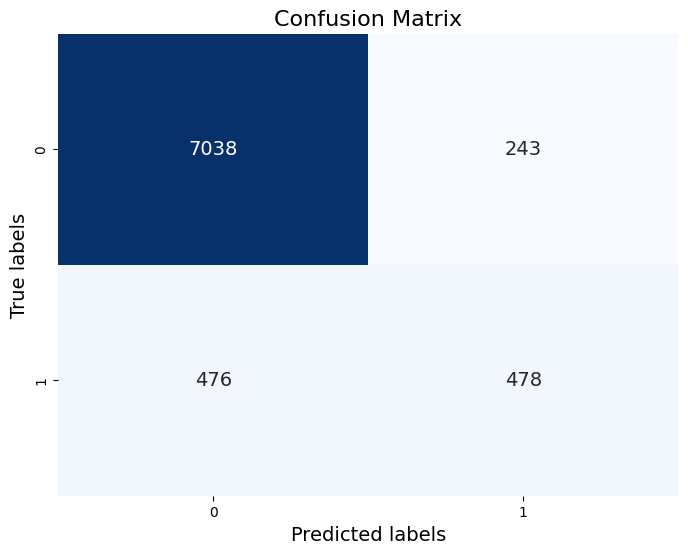


Confusion Matrix for Neural Network Classifier:


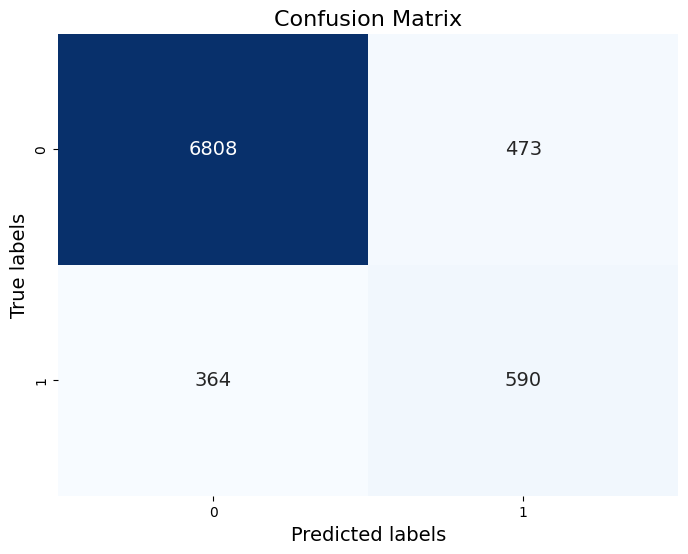

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print Confusion Matrix for Random Forest Classifier
print("\nConfusion Matrix for Random Forest Classifier:")
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Print Confusion Matrix for Neural Network Classifier
print("\nConfusion Matrix for Neural Network Classifier:")
cm_nn = confusion_matrix(y_test, nn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()